<br/><br/><br/><br/><br/>
<font size=6>**Introduction to Working with U.S. Census Data in Python, Part II**</font>
<br/>
<font size=5>**PyData Seattle 2023**
<br/>
[**Darren Erik Vengroff, Ph.D.**](https://www.linkedin.com/in/vengroff/)
<br/>
April 23, 2023 - 2:XX PM
</font>
<br/><br/><br/><br/>
<font size=6>**Case Study: Child Poverty in Newark, NJ**</font>

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

<font size=5>Our hypothetical scenario research question:</font>

<br/>

<font size=6>
    <em>Where in Newark, NJ are there concentrations of children living in poverty?</em>
</font>

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# 0. Some basic imports

In [1]:
import censusdis.data as ced
import censusdis.maps as cem
from censusdis.states import NJ

import pandas as pd

pd.set_option('display.max_colwidth', 200)

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# 1. What Data do We Want?

## Find Groups with Data on Poverty

We know we are interested in finding children living in 
poverty. The ACS5 data set is a good place to start, as 
it has many variables dealing with poverty. So let's start
there.

We will then explore the groups in this this data set and
see which ones deal with poverty. 

Finally, having chosen a candidate group we will verify that
it contains variables that will help us answer our research
question.

In [2]:
DATASET = 'acs/acs5'
VINTAGE = 2021

In [3]:
df_groups = ced.variables.all_groups(DATASET, VINTAGE)

In [4]:
df_groups[
    df_groups['DESCRIPTION'].str.contains('POVERTY') &
    df_groups['DESCRIPTION'].str.contains('AGE')
]

,DATASET,YEAR,GROUP,DESCRIPTION
294,acs/acs5,2021,B10059,POVERTY STATUS IN THE PAST 12 MONTHS OF GRANDPARENTS LIVING WITH OWN GRANDCHILDREN UNDER 18 YEARS BY RESPONSIBILITY FOR OWN GRANDCHILDREN AND AGE OF GRANDPARENT
412,acs/acs5,2021,B16009,POVERTY STATUS IN THE PAST 12 MONTHS BY AGE BY LANGUAGE SPOKEN AT HOME FOR THE POPULATION 5 YEARS AND OVER
414,acs/acs5,2021,B17001,POVERTY STATUS IN THE PAST 12 MONTHS BY SEX BY AGE
415,acs/acs5,2021,B17001A,POVERTY STATUS IN THE PAST 12 MONTHS BY SEX BY AGE (WHITE ALONE)
416,acs/acs5,2021,B17001B,POVERTY STATUS IN THE PAST 12 MONTHS BY SEX BY AGE (BLACK OR AFRICAN AMERICAN ALONE)
417,acs/acs5,2021,B17001C,POVERTY STATUS IN THE PAST 12 MONTHS BY SEX BY AGE (AMERICAN INDIAN AND ALASKA NATIVE ALONE)
418,acs/acs5,2021,B17001D,POVERTY STATUS IN THE PAST 12 MONTHS BY SEX BY AGE (ASIAN ALONE)
419,acs/acs5,2021,B17001E,POVERTY STATUS IN THE PAST 12 MONTHS BY SEX BY AGE (NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE)
420,acs/acs5,2021,B17001F,POVERTY STATUS IN THE PAST 12 MONTHS BY SEX BY AGE (SOME OTHER RACE ALONE)
421,acs/acs5,2021,B17001G,POVERTY STATUS IN THE PAST 12 MONTHS BY SEX BY AGE (TWO OR MORE RACES)


In [5]:
GROUP = 'B17020'

In [6]:
ced.variables.group_tree(DATASET, VINTAGE, GROUP)

+ Estimate
    + Total: (B17020_001E)
        + Income in the past 12 months below poverty level: (B17020_002E)
            + Under 6 years (B17020_003E)
            + 6 to 11 years (B17020_004E)
            + 12 to 17 years (B17020_005E)
            + 18 to 59 years (B17020_006E)
            + 60 to 74 years (B17020_007E)
            + 75 to 84 years (B17020_008E)
            + 85 years and over (B17020_009E)
        + Income in the past 12 months at or above poverty level: (B17020_010E)
            + Under 6 years (B17020_011E)
            + 6 to 11 years (B17020_012E)
            + 12 to 17 years (B17020_013E)
            + 18 to 59 years (B17020_014E)
            + 60 to 74 years (B17020_015E)
            + 75 to 84 years (B17020_016E)
            + 85 years and over (B17020_017E)

In [7]:
VARS_POVERTY_UNDER_18 = ['B17020_003E', 'B17020_004E', 'B17020_005E']

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# 2. What Geographies do we Want?

## Find Newark

In most states, cities, town, townships, villages, etc... are all
lumped into the census geography `[state, place]`.

In [8]:
df_nj_places = ced.download(
    dataset=DATASET,
    vintage=VINTAGE,
    download_variables=['NAME'],
    
    state=NJ,
    place='*'
)

In [9]:
df_nj_places[df_nj_places['NAME'].str.startswith('Newark')] 

,STATE,PLACE,NAME
412,34,51000,"Newark city, New Jersey"


In [10]:
PLACE_EWR = '51000'

In [11]:
gdf_newark = ced.download(
    DATASET,
    VINTAGE,
    ['NAME'] + VARS_POVERTY_UNDER_18,
    
    state=NJ,
    place=PLACE_EWR,
    
    with_geometry=True
)

In [12]:
gdf_newark

,STATE,PLACE,NAME,B17020_003E,B17020_004E,B17020_005E,geometry
0,34,51000,"Newark city, New Jersey",9317,8403,9015,"POLYGON ((-74.25136 40.73753, -74.24975 40.73867, -74.24837 40.73965, -74.24487 40.74068, -74.24391 40.74174, -74.24043 40.74085, -74.23846 40.74472, -74.23790 40.74499, -74.23686 40.74555, -74.23..."


## Make Sure it Looks Like Newark

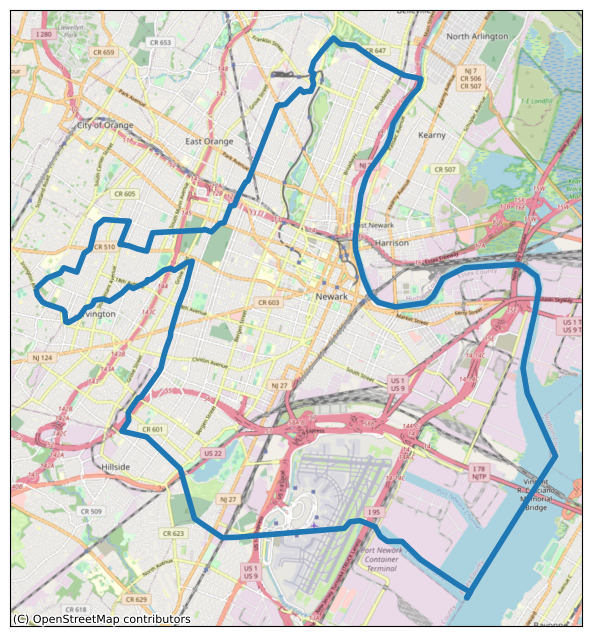

In [13]:
ax = cem.plot_map(
    gdf_newark.boundary,
    
    figsize=(8,8),
    linewidth=4,
    
    # Add a background map from OpenStreetMaps
    # so we can easily verify the geography.
    with_background=True,
)

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## We Want Tract-Level Data

The problem is that census tracts and census places are not
a part of the same geography hierarchy. Census tracts are on-spine
but places are off-spine. So we'll have to get
tracts in a larger area (Essex County) and then filter them down
to just those in Newark.

In [14]:
gdf_essex_tracts = ced.download(
    dataset=DATASET,
    vintage=VINTAGE,
    download_variables=['NAME'] + VARS_POVERTY_UNDER_18,
    
    state=NJ,
    county="013",
    tract="*",
    
    with_geometry=True
)

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Visually Inspect the Tracts vs. the Place

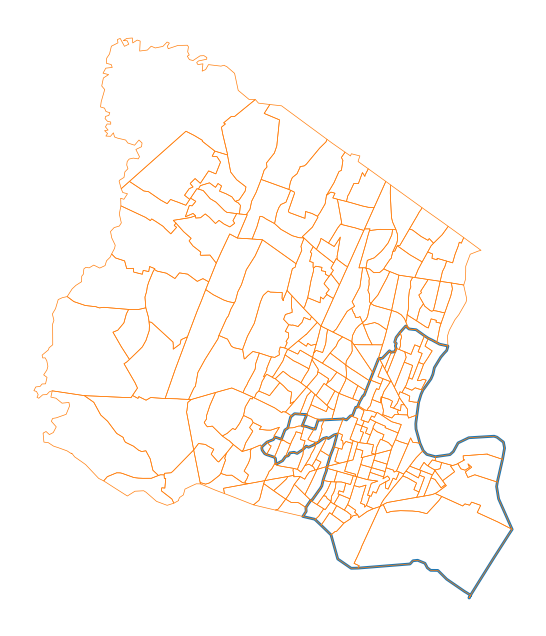

In [15]:
ax = gdf_newark.boundary.plot(
    linewidth=2,
    figsize=(8, 8)
)

ax = gdf_essex_tracts.boundary.plot(
    color='C1',
    linewidth=0.5,
    ax=ax
)

_ = ax.axis('off')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# 3. Filter to Just Newark Tracts

## Spatial Join the Tracts that Intersect Newark

### Try GeoPandas' builtin `GeoDataFrame.sjoin`:

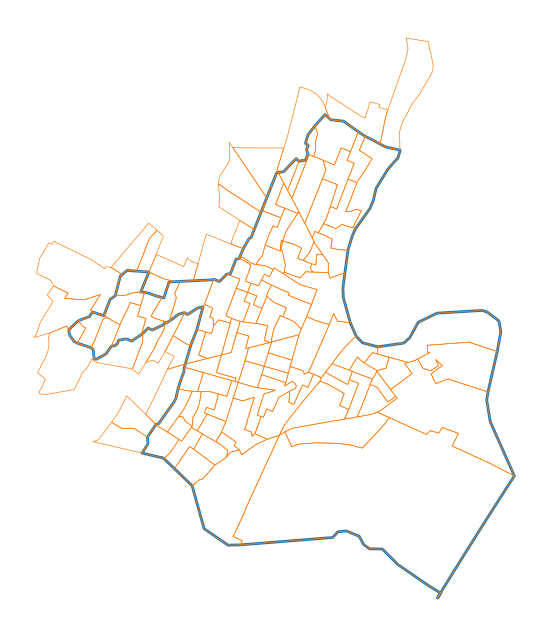

In [16]:
gdf_newark_essex_tracts = gdf_essex_tracts.sjoin(
    gdf_newark,
)

ax = gdf_newark.boundary.plot(
    linewidth=2,
    figsize=(8, 8)
)

ax = gdf_newark_essex_tracts.boundary.plot(
    color='C1',
    linewidth=0.5,
    ax=ax
)

_ = ax.axis('off')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## A Better Way to Join

The spatial join we just did found some tracts outside of Newark.
It is important to always look at maps throughout your research 
process to find problems like this early before you are deep in
your analysis.

When using `GeoDataFrame.sjoin` with
Census maps we often end up with extra unwanted geometries like
we did above. The reason is that there are intersections at the boundaries,
even though the tracts are not really part of Newark.

Luckily, we have `censusdis.maps.sjoin_mostly_contains` 
to rescue us. 

In [17]:
gdf_newark_tracts = cem.sjoin_mostly_contains(
    gdf_large_geos=gdf_newark[['geometry']].copy(),
    gdf_small_geos=gdf_essex_tracts
)

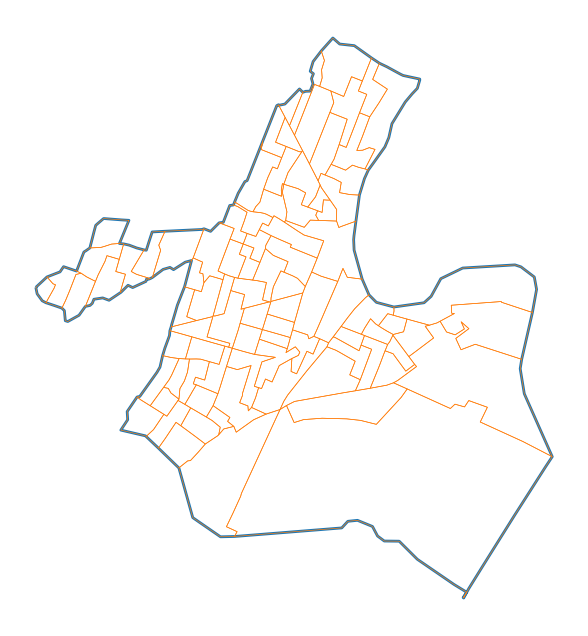

In [18]:
ax = gdf_newark.boundary.plot(
    linewidth=2,
    figsize=(8,8)
)

ax = gdf_newark_tracts.boundary.plot(
    color='C1',
    linewidth=0.5,
    ax=ax
)

_ = ax.axis('off')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# 4. Analysis

Our analysis is very simple. We just add up the variables to
get the total count under 18.

In [19]:
gdf_newark_tracts['TOTAL_POVERTY_UNDER_18'] = gdf_newark_tracts[
    VARS_POVERTY_UNDER_18
].sum(axis='columns')

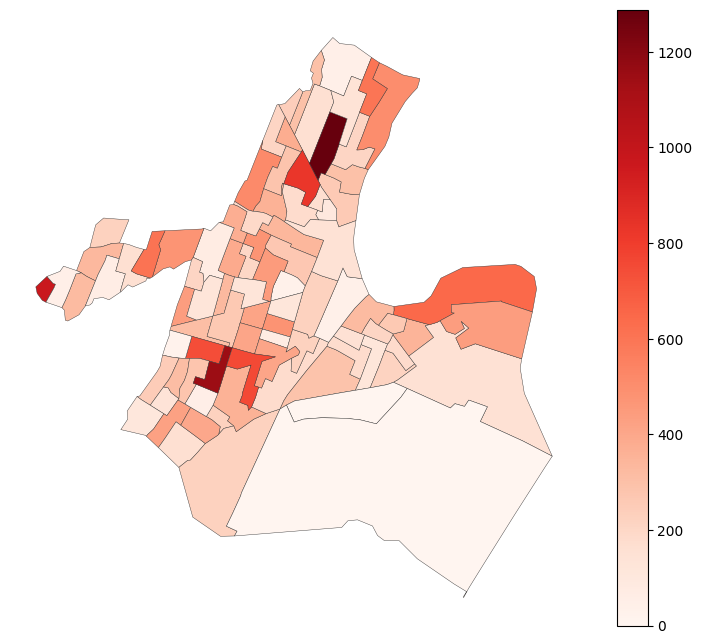

In [20]:
ax = gdf_newark_tracts.plot(
    'TOTAL_POVERTY_UNDER_18',
    
    cmap='Reds',
    edgecolor='#333',
    linewidth=0.3,
        
    legend=True,
    
    figsize=(10, 8)
)

_ = ax.axis('off')

In [21]:
gdf_top_10 = gdf_newark_tracts.nlargest(
    10, 'TOTAL_POVERTY_UNDER_18'
)[['NAME', 'TOTAL_POVERTY_UNDER_18', 'geometry']].reset_index(drop=True)

gdf_top_10

,NAME,TOTAL_POVERTY_UNDER_18,geometry
0,"Census Tract 94, Essex County, New Jersey",1288,"POLYGON ((-74.17718 40.76405, -74.17507 40.76810, -74.17245 40.77311, -74.16781 40.77172, -74.16997 40.76657, -74.17134 40.76359, -74.17172 40.76308, -74.17212 40.76255, -74.17375 40.76038, -74.17..."
1,"Census Tract 54, Essex County, New Jersey",1151,"POLYGON ((-74.20852 40.71927, -74.20605 40.71868, -74.20479 40.72243, -74.20217 40.72187, -74.20063 40.72558, -74.19961 40.72536, -74.19864 40.72516, -74.20020 40.72145, -74.20188 40.71735, -74.20..."
2,"Census Tract 22.03, Essex County, New Jersey",973,"POLYGON ((-74.25136 40.73753, -74.24975 40.73867, -74.24837 40.73965, -74.24676 40.73826, -74.24609 40.73806, -74.24647 40.73734, -74.24865 40.73440, -74.24965 40.73480, -74.25101 40.73622, -74.25..."
3,"Census Tract 91, Essex County, New Jersey",827,"POLYGON ((-74.18370 40.76086, -74.18002 40.76508, -74.17981 40.76538, -74.17794 40.76263, -74.17678 40.76093, -74.17562 40.75919, -74.17506 40.75835, -74.17629 40.75595, -74.17841 40.75386, -74.18..."
4,"Census Tract 232, Essex County, New Jersey",757,"POLYGON ((-74.19864 40.72516, -74.19572 40.72452, -74.19267 40.72389, -74.18708 40.72331, -74.19069 40.72238, -74.19273 40.71741, -74.19158 40.71714, -74.19240 40.71507, -74.19347 40.71311, -74.19..."
5,"Census Tract 41, Essex County, New Jersey",740,"POLYGON ((-74.21122 40.72298, -74.20950 40.72747, -74.20679 40.72689, -74.20367 40.72623, -74.20063 40.72558, -74.20217 40.72187, -74.20479 40.72243, -74.20522 40.72252, -74.20715 40.72293, -74.20..."
6,"Census Tract 75.01, Essex County, New Jersey",649,"POLYGON ((-74.15524 40.73272, -74.15528 40.73354, -74.14719 40.73440, -74.14529 40.73570, -74.14269 40.73930, -74.13680 40.74146, -74.12279 40.74210, -74.12119 40.74170, -74.11760 40.73964, -74.11..."
7,"Census Tract 25, Essex County, New Jersey",604,"POLYGON ((-74.22576 40.74077, -74.22232 40.74515, -74.22172 40.74508, -74.22092 40.74698, -74.22014 40.74880, -74.21870 40.74886, -74.21669 40.74894, -74.21837 40.74611, -74.21787 40.74507, -74.21..."
8,"Census Tract 97, Essex County, New Jersey",602,"POLYGON ((-74.16375 40.77950, -74.16155 40.78368, -74.16128 40.78418, -74.15916 40.78311, -74.16098 40.77982, -74.15703 40.77784, -74.15926 40.77508, -74.16176 40.77221, -74.16450 40.77303, -74.16..."
9,"Census Tract 7, Essex County, New Jersey",516,"POLYGON ((-74.19706 40.75666, -74.19526 40.75904, -74.19466 40.75923, -74.19365 40.76118, -74.19154 40.76522, -74.19045 40.76731, -74.19089 40.76555, -74.18912 40.76502, -74.18648 40.76423, -74.18..."


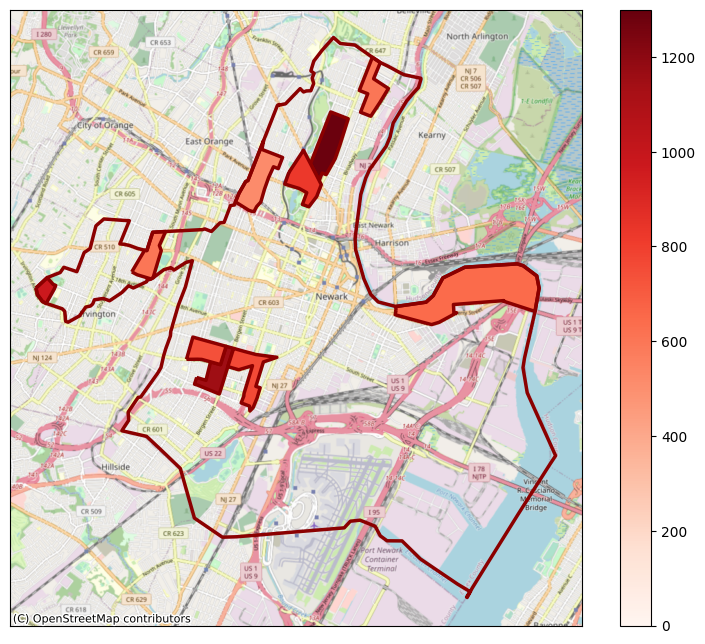

In [22]:
ax = cem.plot_map(
    gdf_top_10,
    'TOTAL_POVERTY_UNDER_18',
    
    cmap='Reds',
    edgecolor='darkred', 
    linewidth=2.5,
                
    vmin=0,
    vmax=1300,
    legend=True,
    
    figsize=(10, 8)
)

ax = cem.plot_map(
    gdf_newark.boundary,
    edgecolor="darkred",
    linewidth=2.5,
    ax=ax,
    with_background=True
)

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Suggested next steps...

We now have the key data and geographies we want to present.
At this point we can style the map, format tables or data,
visit some of the tracts, prepare narratives, or whatever is
appropriate to present the data in a way that will deliver
the message we want to deliver.